### Image Classification for Traffic Signs

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import PIL
import tensorflow as tf
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1G5F32jEJ8PLB91ImsDiPJUA2XGsqZ5bo

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1G5F32jEJ8PLB91ImsDiPJUA2XGsqZ5bo
From (redirected): https://drive.google.com/uc?id=1G5F32jEJ8PLB91ImsDiPJUA2XGsqZ5bo&confirm=t&uuid=af4f3591-fbfb-4719-952b-7ea7936ab311
To: /content/Traffic_Sign_-2.zip
100% 94.4M/94.4M [00:01<00:00, 72.9MB/s]


In [ ]:
!unzip "Traffic_Sign_-2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00014_00001.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00013_00000.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00004_00004.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00013_00007.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00010_00003.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00013_00024.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00007_00017.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00013_00020.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00013_00004.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00011_00028.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00004_00003.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00008_00006.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00011_00019.png  
  inflating: Traffic_Sign_-2/Train/No Entry/00014_00011_00002.png

In [ ]:
!ls

sample_data  Traffic_Sign_-2  Traffic_Sign_-2.zip


In [ ]:
data_dir = "Traffic_Sign_-2(augmented)/Traffic_Sign_-2(Augmented)"
train_dir = data_dir + '/Train'
test_dir = data_dir + '/Test'

In [ ]:
import os
from PIL import Image
train_dir = "/content/Traffic_Sign_-2/Train"
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        extension = os.path.splitext(filename)[1].lower()
        if extension not in ['.jpg', '.jpeg', '.png']:
            print(f"Skipping {file_path} due to invalid file extension")
            continue
        try:
            with Image.open(file_path) as img:
                pass
        except Exception as e:
            print(f"Deleting {file_path} due to error: {e}")
            os.remove(file_path)

# **Data Visualization**

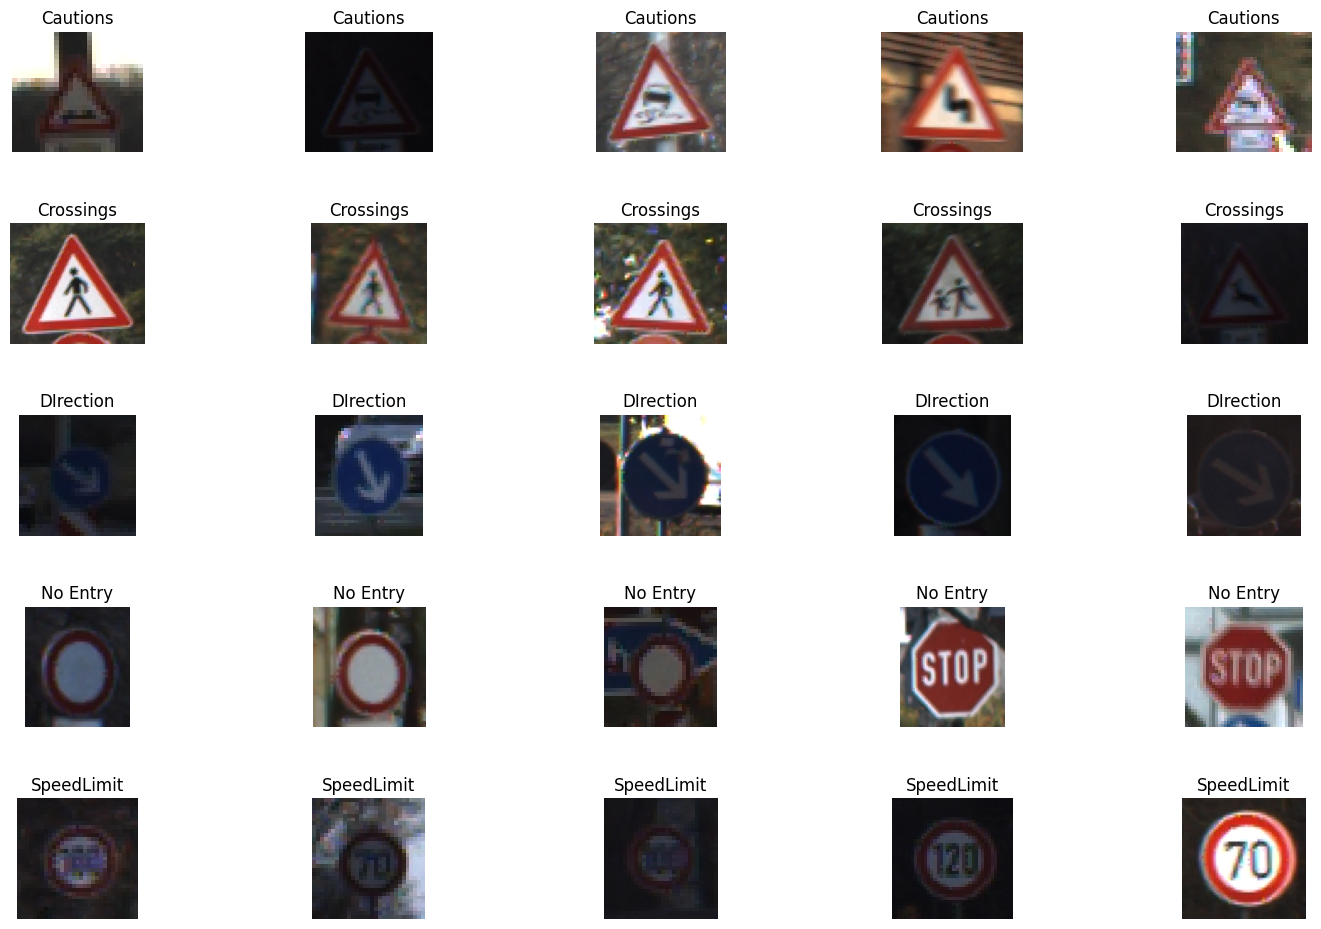

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def load_images_from_folder(folder, count=5):
    """ Load 'count' images from the specified folder. """
    images = []
    for filename in os.listdir(folder):
        if len(images) == count:
            break
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Set the base path to your dataset
base_path = 'Traffic_Sign_-2/Train/'

# Define your classes
categories = ['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']

# Prepare the figure
fig, axs = plt.subplots(nrows=len(categories), ncols=5, figsize=(15, 10))
fig.tight_layout(pad=3.0)

# Load and plot images from each category
for i, category in enumerate(categories):
    images = load_images_from_folder(os.path.join(base_path, category))
    for j, img in enumerate(images):
        axs[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(f"{category}")
        axs[i, j].axis('off')

# Display the figure
plt.show()


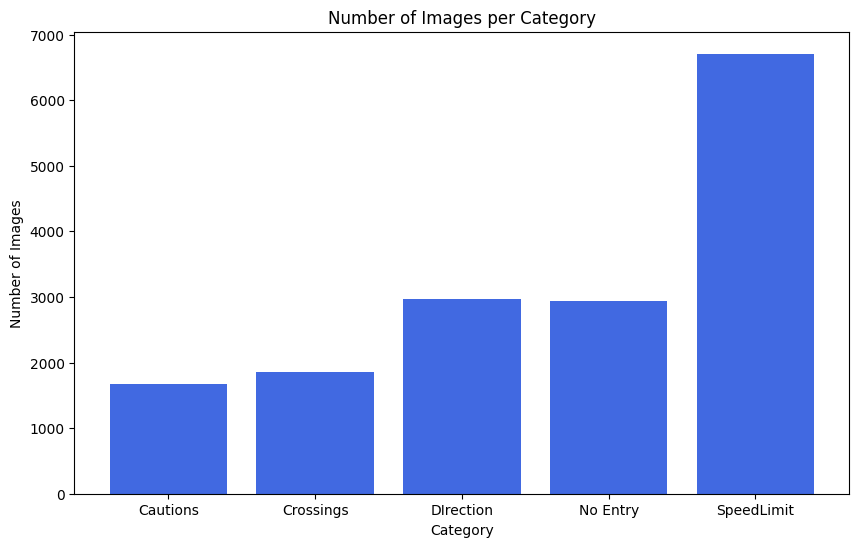

In [ ]:
import os
import matplotlib.pyplot as plt

base_path = 'Traffic_Sign_-2/Train/'
categories = ['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']

# Count the number of images per category
image_counts = {category: len(os.listdir(os.path.join(base_path, category)))
                for category in categories}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='royalblue')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


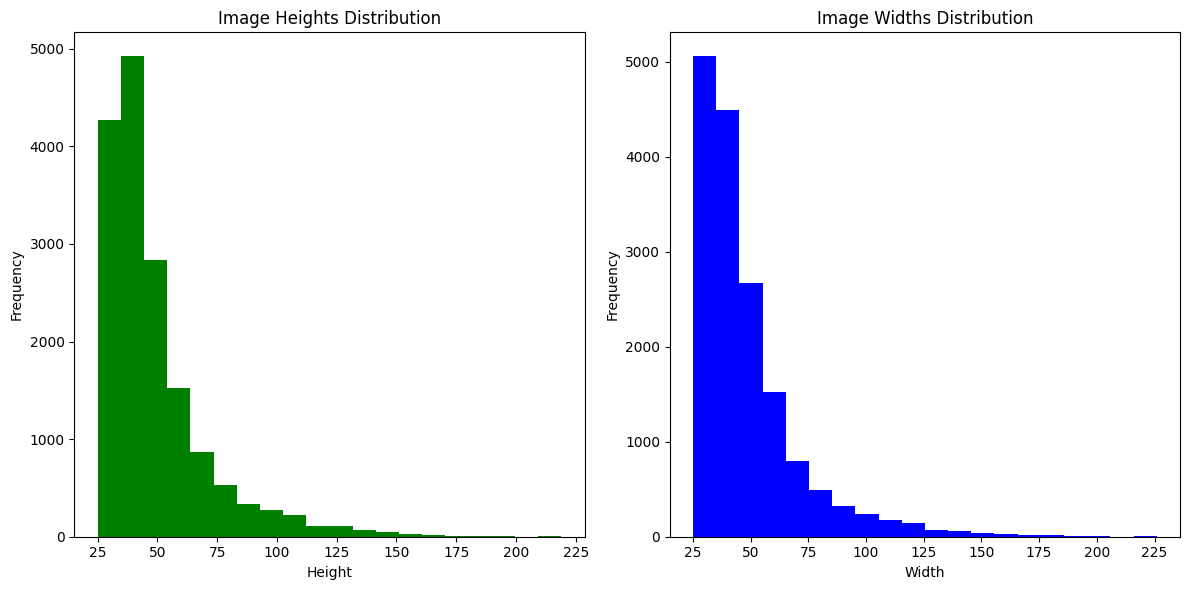

In [ ]:
import cv2

image_sizes = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        img_path = os.path.join(category_path, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # Collect height and width

heights, widths = zip(*image_sizes)

# Plotting the distributions of image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='green')
plt.title('Image Heights Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='blue')
plt.title('Image Widths Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
img_height = 180
img_width = 180
# Setup augmentation configuration with ImageDataGenerator
augmentation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotate the images between 0 and 20 degrees
    width_shift_range=0.2,   # Shift the images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift the images vertically by up to 20% of the height
    shear_range=0.15,        # Shear the image by 15 degrees
    zoom_range=0.15,         # Zoom into the image by 15%
    horizontal_flip=True,    # Allow horizontal flipping
    fill_mode='nearest'      # Fill in new pixels with the nearest pixel values
)

# Assuming 'base_path' points to your training directory
base_path = 'Traffic_Sign_-2/Train/'

# Create the generator to fetch images from the directory
train_augmented_generator = augmentation_datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,         # Process images in batches of 32
    class_mode='categorical',  # Since you are handling multiple classes
    shuffle=True           # Shuffle the order of images
)




Found 16157 images belonging to 5 classes.


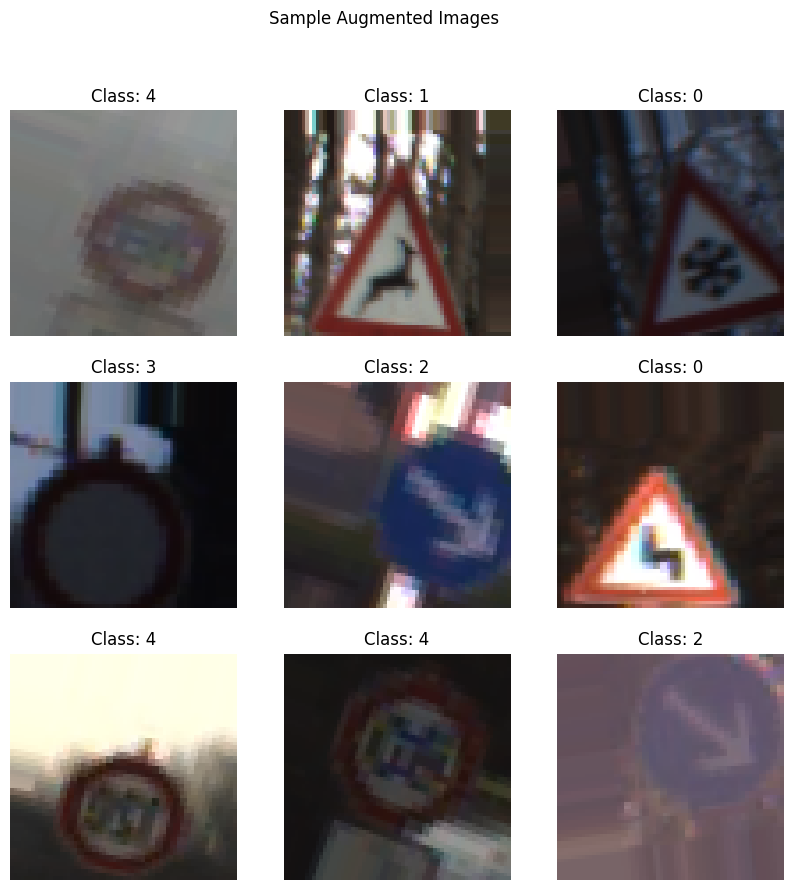

In [ ]:
import matplotlib.pyplot as plt

# Fetch a batch of augmented images
augmented_images, labels = next(train_augmented_generator)

# Plotting the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(augmented_images[i])
    ax.axis("off")
    # Decoding the labels if needed
    label = labels[i]
    ax.set_title(f"Class: {label.argmax()}")  # Assuming 'argmax' since 'categorical'

plt.suptitle("Sample Augmented Images")
plt.show()


# **FCNN**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Adjusted ImageDataGenerators with validation_split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3  # Ensuring there's a 20% split for validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # Same split percentage as training
)

# Now setup the generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify this is training data
)

validation_generator = validation_datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify this is validation data
)



valid_ds = tf.keras.utils.image_dataset_from_directory(
base_path,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)


Found 11312 images belonging to 5 classes.
Found 4845 images belonging to 5 classes.
Found 16157 files belonging to 5 classes.
Using 3231 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Creating an enhanced FCNN model
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input images to a vector

    Dense(512, activation='relu'),x
    Dropout(0.3),  # Dropout layer after the first dense layer

    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer after the second dense layer

    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout layer after the third dense layer

    Dense(5, activation='softmax')  # Output layer with 5 units for classification
])

# Compiling the model with a specific learning rate
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary to see the changes
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    verbose=1  # Ensure verbose is set to 1 (default) to get the output per epoch
)


Epoch 1/15
354/354 [==============================] - 24s 68ms/step - loss: 1.0383 - accuracy: 0.6253 - val_loss: 0.5942 - val_accuracy: 0.8033
Epoch 2/15
354/354 [==============================] - 24s 69ms/step - loss: 0.9561 - accuracy: 0.6452 - val_loss: 0.6379 - val_accuracy: 0.7513
Epoch 3/15
354/354 [==============================] - 24s 69ms/step - loss: 0.8887 - accuracy: 0.6609 - val_loss: 0.4839 - val_accuracy: 0.8353
Epoch 4/15
354/354 [==============================] - 26s 73ms/step - loss: 0.8693 - accuracy: 0.6677 - val_loss: 0.5334 - val_accuracy: 0.8132
Epoch 5/15
354/354 [==============================] - 24s 68ms/step - loss: 0.8849 - accuracy: 0.6657 - val_loss: 0.4949 - val_accuracy: 0.8101
Epoch 6/15
354/354 [==============================] - 23s 64ms/step - loss: 0.8683 - accuracy: 0.6660 - val_loss: 0.4548 - val_accuracy: 0.8188
Epoch 7/15
354/354 [==============================] - 24s 68ms/step - loss: 0.8537 - accuracy: 0.6732 - val_loss: 0.4219 - val_accuracy:

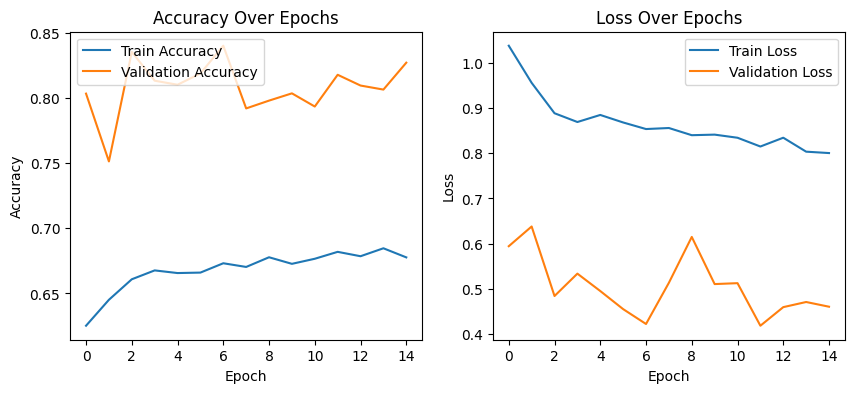

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


In [ ]:
#This code block creates a test dataset from the images Located in the "./Fruit Classification
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Traffic_Sign_-2/Train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#number of Classes
class_names = test_ds.class_names
print(class_names)

Found 16157 files belonging to 5 classes.
['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']


In [ ]:
import tensorflow as tf
import os
import random

# Define the directory and parameters
train_directory = "/content/Traffic_Sign_-2/Train"
img_height = 64  # Set to match model's expected height
img_width = 64   # Set to match model's expected width
batch_size = 32   # Example batch size
num_samples_per_class = 10  # Number of images per class for the test set

# Load the full training dataset to get class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names and number of classes
class_names = train_ds.class_names
print("Class names:", class_names)
num_classes = len(class_names)

# Function to load and preprocess images
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    try:
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Allow dynamic shape for height and width
        image = tf.image.resize(image, [img_height, img_width])
        image.set_shape((img_height, img_width, 3))  # Ensure the final shape
        label = tf.one_hot(label, num_classes)  # One-hot encode the label
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        image = tf.zeros((img_height, img_width, 3))  # Use a placeholder in case of error
        label = tf.one_hot(label, num_classes)  # One-hot encode the placeholder label
    return image, label

# Sample 10 images per class
test_image_paths = []
test_labels = []

# Get a list of all images and their corresponding labels
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(train_directory, class_name)
    all_images = os.listdir(class_dir)
    selected_images = random.sample(all_images, num_samples_per_class)
    test_image_paths.extend([os.path.join(class_dir, img) for img in selected_images])
    test_labels.extend([class_index] * num_samples_per_class)

# Ensure all paths are valid and images are correctly loaded
valid_image_paths = []
valid_labels = []
for path, label in zip(test_image_paths, test_labels):
    try:
        image = tf.io.read_file(path)
        image = tf.image.decode_image(image, channels=3)
        if image.shape.rank == 3:  # Ensure image is 3-dimensional
            valid_image_paths.append(path)
            valid_labels.append(label)
    except Exception as e:
        print(f"Skipping file {path} due to error: {e}")

# Create a TensorFlow dataset from the valid image paths and labels
test_ds = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_ds = test_ds.map(lambda x, y: load_and_preprocess_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print("Test Accuracy: ", accuracy)
print("Test loss: ", loss)


Found 16157 files belonging to 5 classes.
Class names: ['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']
2/2 [==============================] - 0s 10ms/step - loss: 25.4419 - accuracy: 0.6400
Test Accuracy:  0.6399999856948853
Test loss:  25.441865921020508


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming 'validation_generator' is already set up and the model is trained

# Make predictions with the model
predictions = model.predict(validation_generator)
true_labels = validation_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

# Convert labels to categorical
true_labels_categorical = to_categorical(true_labels, num_classes=5)


152/152 [==============================] - 2s 15ms/step


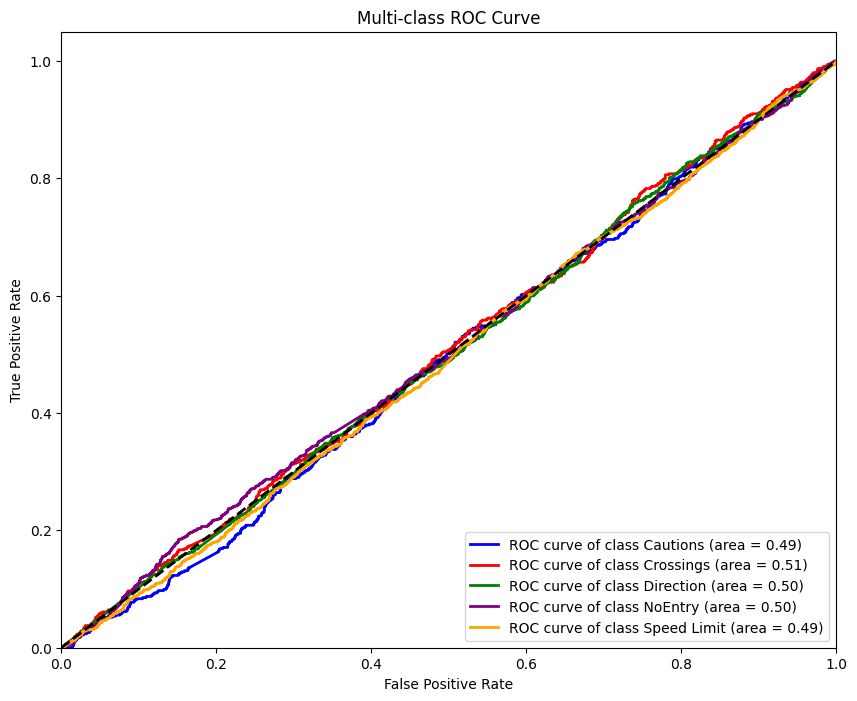

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 5 classes
    fpr[i], tpr[i], _ = roc_curve(true_labels_categorical[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colors for the ROC curves
colors = ['blue', 'red', 'green', 'purple', 'orange']
class_names = ['Cautions', 'Crossings', 'Direction', 'NoEntry', 'Speed Limit']  # Adjust class names as necessary

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 87ms/step
Image: 00021_00000_00000.png, Predicted Class: Speed Limit


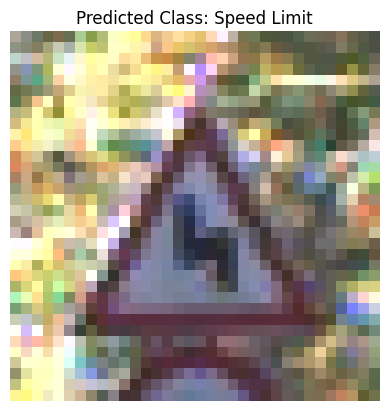

1/1 [==============================] - 0s 17ms/step
Image: 00021_00000_00001.png, Predicted Class: Speed Limit


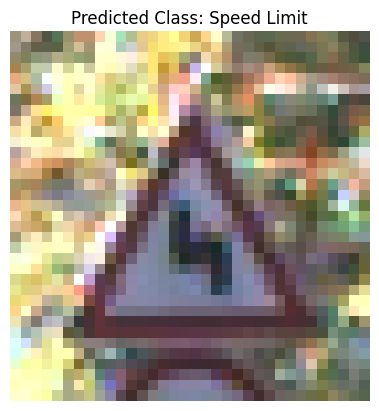

1/1 [==============================] - 0s 16ms/step
Image: 00027_00000_00002.png, Predicted Class: Crossings


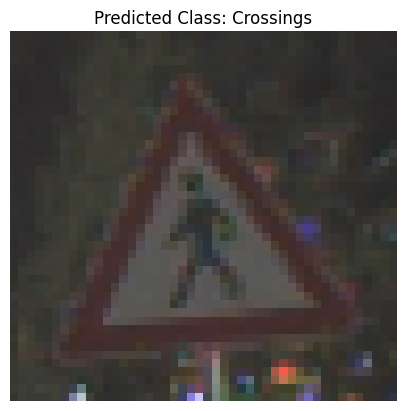

1/1 [==============================] - 0s 19ms/step
Image: 00027_00000_00003.png, Predicted Class: Crossings


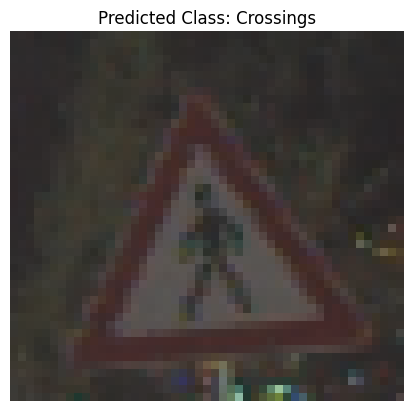

1/1 [==============================] - 0s 17ms/step
Image: 00015_00002_00026.png, Predicted Class: Speed Limit


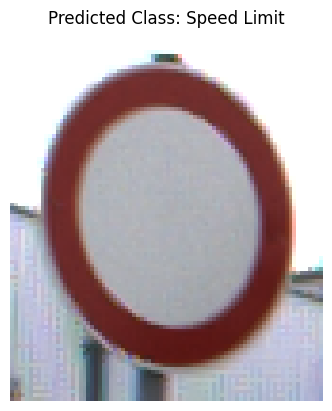

1/1 [==============================] - 0s 19ms/step
Image: 00014_00000_00002.png, Predicted Class: NoEntry


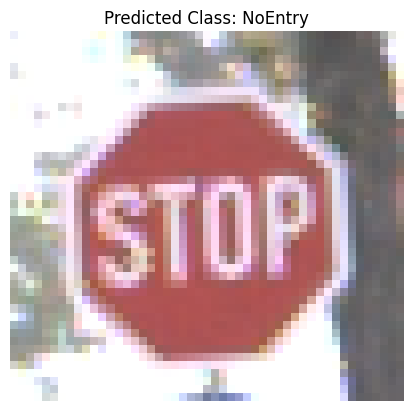

1/1 [==============================] - 0s 17ms/step
Image: 00008_00013_00018.png, Predicted Class: Speed Limit


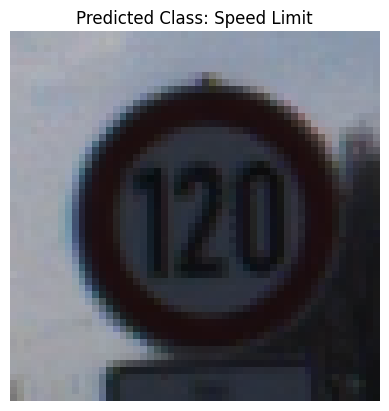

1/1 [==============================] - 0s 18ms/step
Image: 00036_00000_00001.png, Predicted Class: Direction


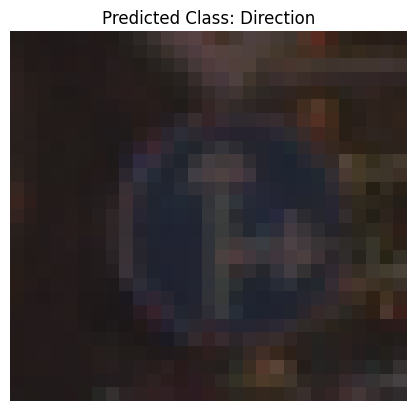

1/1 [==============================] - 0s 18ms/step
Image: 00004_00002_00011.png, Predicted Class: Speed Limit


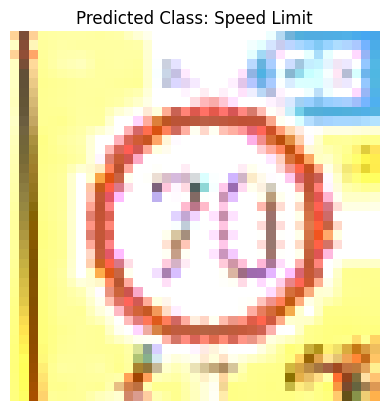

1/1 [==============================] - 0s 18ms/step
Image: 00036_00000_00002.png, Predicted Class: Direction


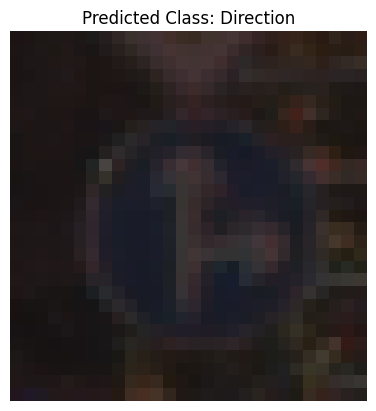

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def preprocess_image(image_path, target_size=(64, 64)):
    # Load image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to array
    img = img_to_array(img)
    # Scale the image
    img = img / 255.0
    # Expand dimensions to match the batch size
    img = np.expand_dims(img, axis=0)
    return img

# Provide the directory path containing images
test_dir_path = '/content/Traffic_Sign_-2/Test/'

# Dictionary mapping class indices to labels
class_labels = {0: 'Cautions', 1: 'Crossings', 2: 'Direction', 3: 'NoEntry', 4: 'Speed Limit'}

# Process each image in the directory
for filename in os.listdir(test_dir_path):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Check for image files
        image_path = os.path.join(test_dir_path, filename)
        test_image = preprocess_image(image_path)
        predictions = model.predict(test_image)
        predicted_class_index = np.argmax(predictions, axis=1)
        predicted_class_label = class_labels[predicted_class_index[0]]

        # Output the result
        print(f"Image: {filename}, Predicted Class: {predicted_class_label}")

        # Display the image and prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class_label}")
        plt.axis('off')
        plt.show()


2/2 [==============================] - 0s 9ms/step


<Figure size 1000x800 with 0 Axes>

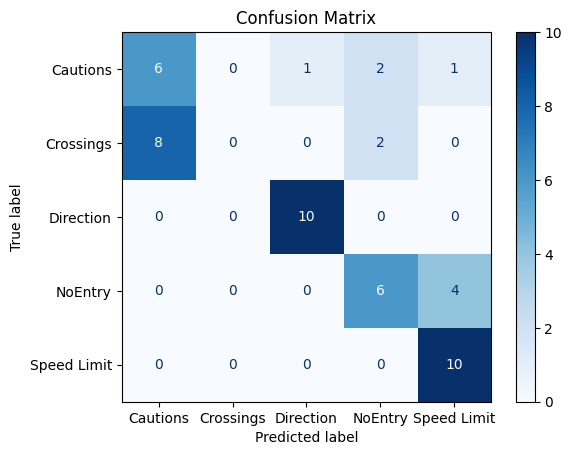

In [ ]:
# Function to load and preprocess images (without one-hot encoding labels)
def load_and_preprocess_image_no_one_hot(path, label):
    image = tf.io.read_file(path)
    try:
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Allow dynamic shape for height and width
        image = tf.image.resize(image, [img_height, img_width])
        image.set_shape((img_height, img_width, 3))  # Ensure the final shape
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        image = tf.zeros((img_height, img_width, 3))  # Use a placeholder in case of error
    return image, label

# Create a TensorFlow dataset from the valid image paths and labels
test_ds_no_one_hot = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_ds_no_one_hot = test_ds_no_one_hot.map(lambda x, y: load_and_preprocess_image_no_one_hot(x, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds_no_one_hot = test_ds_no_one_hot.batch(batch_size)

# Make predictions on the test dataset
predictions = model.predict(test_ds_no_one_hot)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, label in test_ds_no_one_hot.unbatch():
    true_labels.append(label.numpy())

true_labels = np.array(true_labels)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# **CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

CNNmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Setting the optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0001)

# Compiling the model
CNNmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the model's architecture
CNNmodel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                      

In [ ]:
history = CNNmodel.fit(
    train_generator,
    epochs=15,  # More epochs for deeper learning
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/15
354/354 [==============================] - 34s 81ms/step - loss: 1.1395 - accuracy: 0.5625 - val_loss: 0.6181 - val_accuracy: 0.8083
Epoch 2/15
354/354 [==============================] - 27s 75ms/step - loss: 0.5649 - accuracy: 0.7830 - val_loss: 0.3215 - val_accuracy: 0.8516
Epoch 3/15
354/354 [==============================] - 27s 76ms/step - loss: 0.3719 - accuracy: 0.8511 - val_loss: 0.3145 - val_accuracy: 0.8706
Epoch 4/15
354/354 [==============================] - 27s 76ms/step - loss: 0.2900 - accuracy: 0.8803 - val_loss: 0.3080 - val_accuracy: 0.8824
Epoch 5/15
354/354 [==============================] - 29s 81ms/step - loss: 0.2272 - accuracy: 0.9008 - val_loss: 0.2698 - val_accuracy: 0.8925
Epoch 6/15
354/354 [==============================] - 27s 76ms/step - loss: 0.2014 - accuracy: 0.9145 - val_loss: 0.2358 - val_accuracy: 0.9082
Epoch 7/15
354/354 [==============================] - 27s 77ms/step - loss: 0.1614 - accuracy: 0.9325 - val_loss: 0.2240 - val_accuracy:

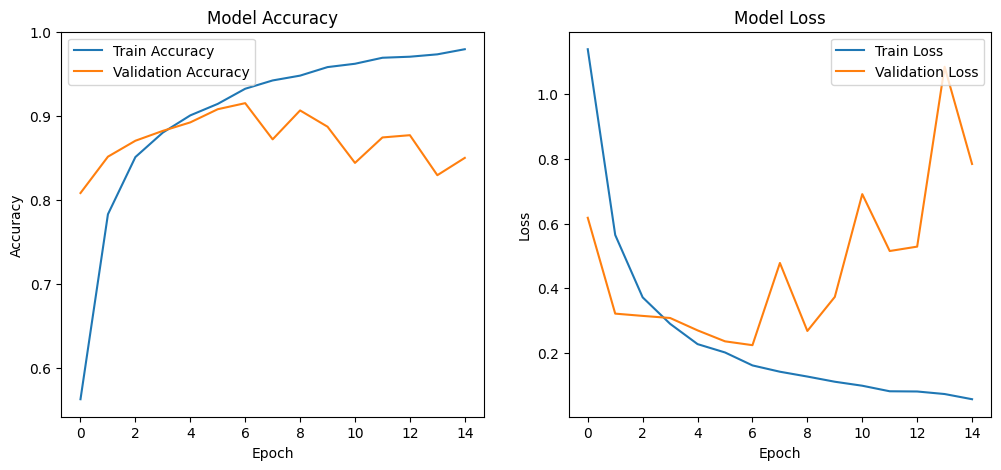

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


152/152 [==============================] - 3s 16ms/step


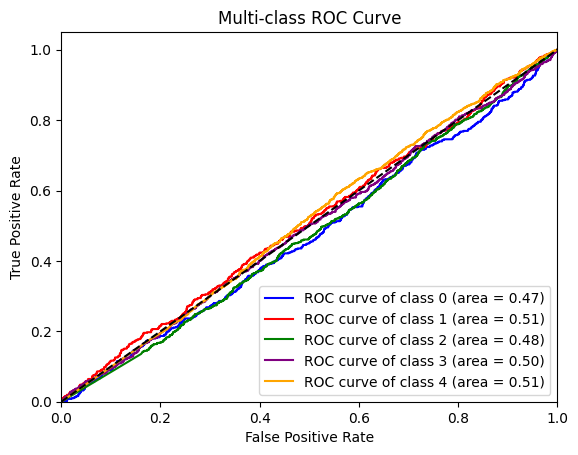

In [ ]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
import numpy as np

# Get predictions and true labels
predictions = CNNmodel.predict(validation_generator)
true_labels = validation_generator.classes
n_classes = 5

# Binarize the true labels for multi-class ROC curve
true_labels = label_binarize(true_labels, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 1s 541ms/step
Image: 00021_00000_00000.png, Predicted Class: Crossings


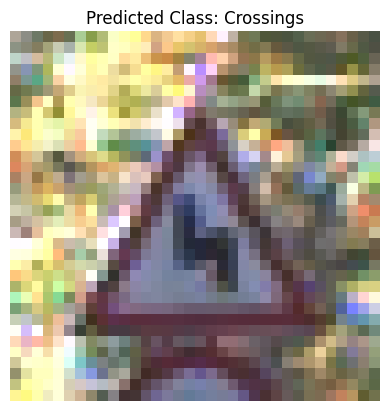

1/1 [==============================] - 0s 18ms/step
Image: 00021_00000_00001.png, Predicted Class: Cautions


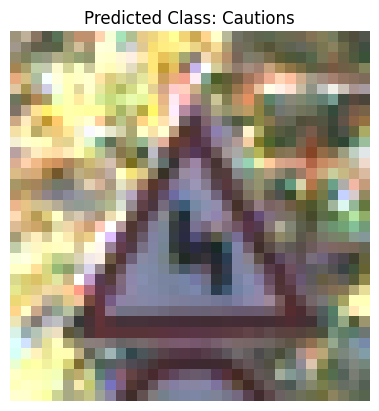

1/1 [==============================] - 0s 18ms/step
Image: 00027_00000_00002.png, Predicted Class: Crossings


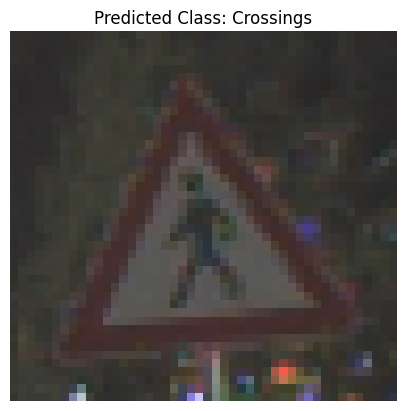

1/1 [==============================] - 0s 18ms/step
Image: 00027_00000_00003.png, Predicted Class: Crossings


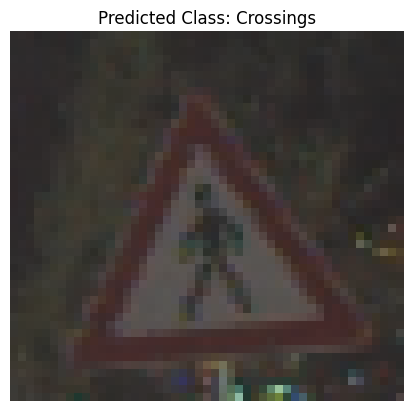

1/1 [==============================] - 0s 17ms/step
Image: 00015_00002_00026.png, Predicted Class: NoEntry


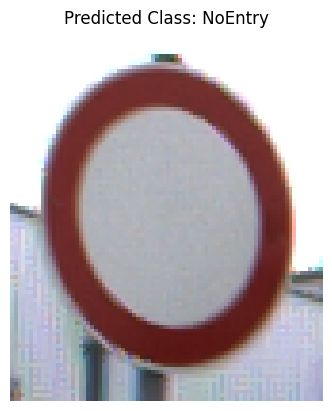

1/1 [==============================] - 0s 19ms/step
Image: 00014_00000_00002.png, Predicted Class: Speed Limit


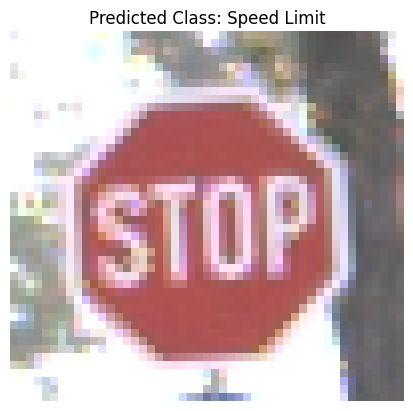

1/1 [==============================] - 0s 18ms/step
Image: 00008_00013_00018.png, Predicted Class: Speed Limit


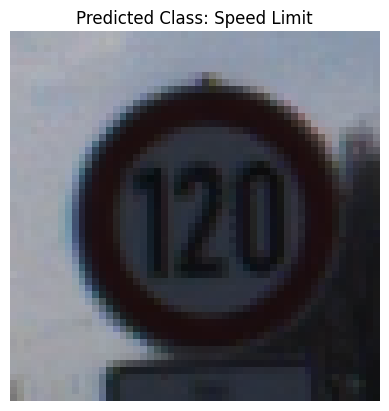

1/1 [==============================] - 0s 19ms/step
Image: 00036_00000_00001.png, Predicted Class: Direction


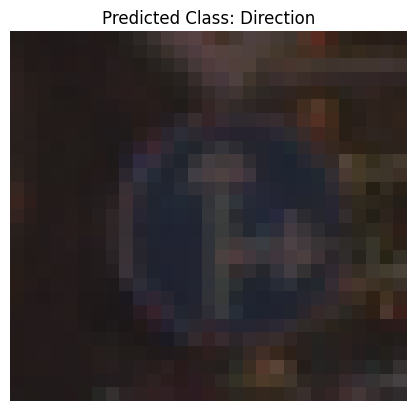

1/1 [==============================] - 0s 18ms/step
Image: 00004_00002_00011.png, Predicted Class: Speed Limit


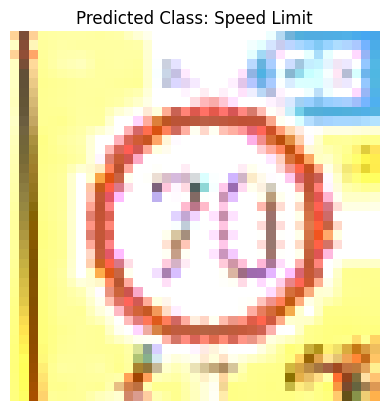

1/1 [==============================] - 0s 18ms/step
Image: 00036_00000_00002.png, Predicted Class: Direction


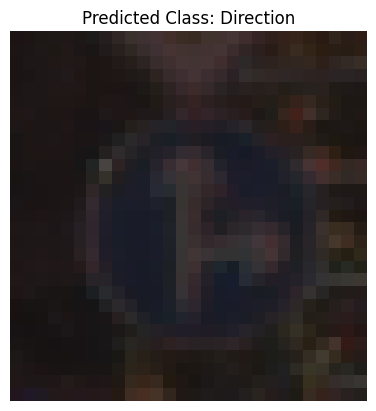

In [ ]:
def preprocess_image(image_path, target_size=(64, 64)):
    # Load image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to array
    img = img_to_array(img)
    # Scale the image
    img = img / 255.0
    # Expand dimensions to match the batch size
    img = np.expand_dims(img, axis=0)
    return img

# Provide the directory path containing images
test_dir_path = '/content/Traffic_Sign_-2/Test/'

# Dictionary mapping class indices to labels
class_labels = {0: 'Cautions', 1: 'Crossings', 2: 'Direction', 3: 'NoEntry', 4: 'Speed Limit'}

# Process each image in the directory
for filename in os.listdir(test_dir_path):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Check for image files
        image_path = os.path.join(test_dir_path, filename)
        test_image = preprocess_image(image_path)
        predictions = CNNmodel.predict(test_image)
        predicted_class_index = np.argmax(predictions, axis=1)
        predicted_class_label = class_labels[predicted_class_index[0]]

        # Output the result
        print(f"Image: {filename}, Predicted Class: {predicted_class_label}")

        # Display the image and prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class_label}")
        plt.axis('off')
        plt.show()


In [ ]:
import tensorflow as tf
import os
import random

# Define the directory and parameters
train_directory = "/content/Traffic_Sign_-2/Train"
img_height = 64  # Set to match model's expected height
img_width = 64   # Set to match model's expected width
batch_size = 32   # Example batch size
num_samples_per_class = 10  # Number of images per class for the test set

# Load the full training dataset to get class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names and number of classes
class_names = train_ds.class_names
print("Class names:", class_names)
num_classes = len(class_names)

# Function to load and preprocess images
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    try:
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Allow dynamic shape for height and width
        image = tf.image.resize(image, [img_height, img_width])
        image.set_shape((img_height, img_width, 3))  # Ensure the final shape
        label = tf.one_hot(label, num_classes)  # One-hot encode the label
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        image = tf.zeros((img_height, img_width, 3))  # Use a placeholder in case of error
        label = tf.one_hot(label, num_classes)  # One-hot encode the placeholder label
    return image, label

# Sample 10 images per class
test_image_paths = []
test_labels = []

# Get a list of all images and their corresponding labels
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(train_directory, class_name)
    all_images = os.listdir(class_dir)
    selected_images = random.sample(all_images, num_samples_per_class)
    test_image_paths.extend([os.path.join(class_dir, img) for img in selected_images])
    test_labels.extend([class_index] * num_samples_per_class)

# Ensure all paths are valid and images are correctly loaded
valid_image_paths = []
valid_labels = []
for path, label in zip(test_image_paths, test_labels):
    try:
        image = tf.io.read_file(path)
        image = tf.image.decode_image(image, channels=3)
        if image.shape.rank == 3:  # Ensure image is 3-dimensional
            valid_image_paths.append(path)
            valid_labels.append(label)
    except Exception as e:
        print(f"Skipping file {path} due to error: {e}")

# Create a TensorFlow dataset from the valid image paths and labels
test_ds = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_ds = test_ds.map(lambda x, y: load_and_preprocess_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size)

# Evaluate the model
loss, accuracy = CNNmodel.evaluate(test_ds)
print("Test Accuracy: ", accuracy)
print("Test loss: ", loss)


Found 16157 files belonging to 5 classes.
Class names: ['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']
2/2 [==============================] - 0s 419ms/step - loss: 138.4585 - accuracy: 0.8400
Test Accuracy:  0.8399999737739563
Test loss:  138.45849609375


2/2 [==============================] - 0s 20ms/step


<Figure size 1000x800 with 0 Axes>

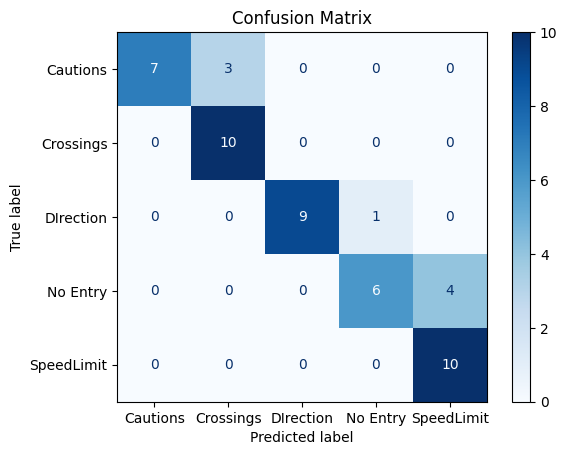

In [ ]:
# Function to load and preprocess images (without one-hot encoding labels)
def load_and_preprocess_image_no_one_hot(path, label):
    image = tf.io.read_file(path)
    try:
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Allow dynamic shape for height and width
        image = tf.image.resize(image, [img_height, img_width])
        image.set_shape((img_height, img_width, 3))  # Ensure the final shape
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        image = tf.zeros((img_height, img_width, 3))  # Use a placeholder in case of error
    return image, label

# Create a TensorFlow dataset from the valid image paths and labels
test_ds_no_one_hot = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_ds_no_one_hot = test_ds_no_one_hot.map(lambda x, y: load_and_preprocess_image_no_one_hot(x, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds_no_one_hot = test_ds_no_one_hot.batch(batch_size)

# Make predictions on the test dataset
predictions = CNNmodel.predict(test_ds_no_one_hot)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, label in test_ds_no_one_hot.unbatch():
    true_labels.append(label.numpy())

true_labels = np.array(true_labels)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# **VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the base VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()  # This will give us detailed layer outputs

# Check the output shape of the last layer
print("Output shape of the last layer:", base_model.output.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Load the base VGG16 model without the top layers and make sure to freeze the appropriate layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the layers to not train them again

# Build custom top layers for the model
x = Flatten()(base_model.output)  # Flatten the outputs of the base model from (None, 7, 7, 512)
x = Dense(512, activation='relu')(x)  # First dense layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(5, activation='softmax')(x)  # Final dense layer with softmax for classification

# Complete model
VGG16model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
VGG16model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the setup
VGG16model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

# Now setup the generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 11312 images belonging to 5 classes.
Found 4845 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a new top classification layer for our dataset
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Define the new model
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an optimizer and a loss function
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/Traffic_Sign_-2/Train'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation')

vgg16_history = vgg16_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1,
        steps_per_epoch=len(train_generator),
        validation_steps=len(validation_generator),
        workers=5)

Found 12928 images belonging to 5 classes.
Found 3229 images belonging to 5 classes.
Epoch 1/10
101/101 [==============================] - 289s 3s/step - loss: 0.5053 - accuracy: 0.8219 - val_loss: 0.3261 - val_accuracy: 0.8467
Epoch 2/10
101/101 [==============================] - 231s 2s/step - loss: 0.2178 - accuracy: 0.9327 - val_loss: 0.2731 - val_accuracy: 0.8792
Epoch 3/10
101/101 [==============================] - 243s 2s/step - loss: 0.1442 - accuracy: 0.9602 - val_loss: 0.3310 - val_accuracy: 0.8801
Epoch 4/10
101/101 [==============================] - 229s 2s/step - loss: 0.1125 - accuracy: 0.9703 - val_loss: 0.2833 - val_accuracy: 0.8938
Epoch 5/10
101/101 [==============================] - 232s 2s/step - loss: 0.0947 - accuracy: 0.9746 - val_loss: 0.2680 - val_accuracy: 0.8935
Epoch 6/10
101/101 [==============================] - 241s 2s/step - loss: 0.0777 - accuracy: 0.9804 - val_loss: 0.3203 - val_accuracy: 0.8771
Epoch 7/10
101/101 [==============================] - 228

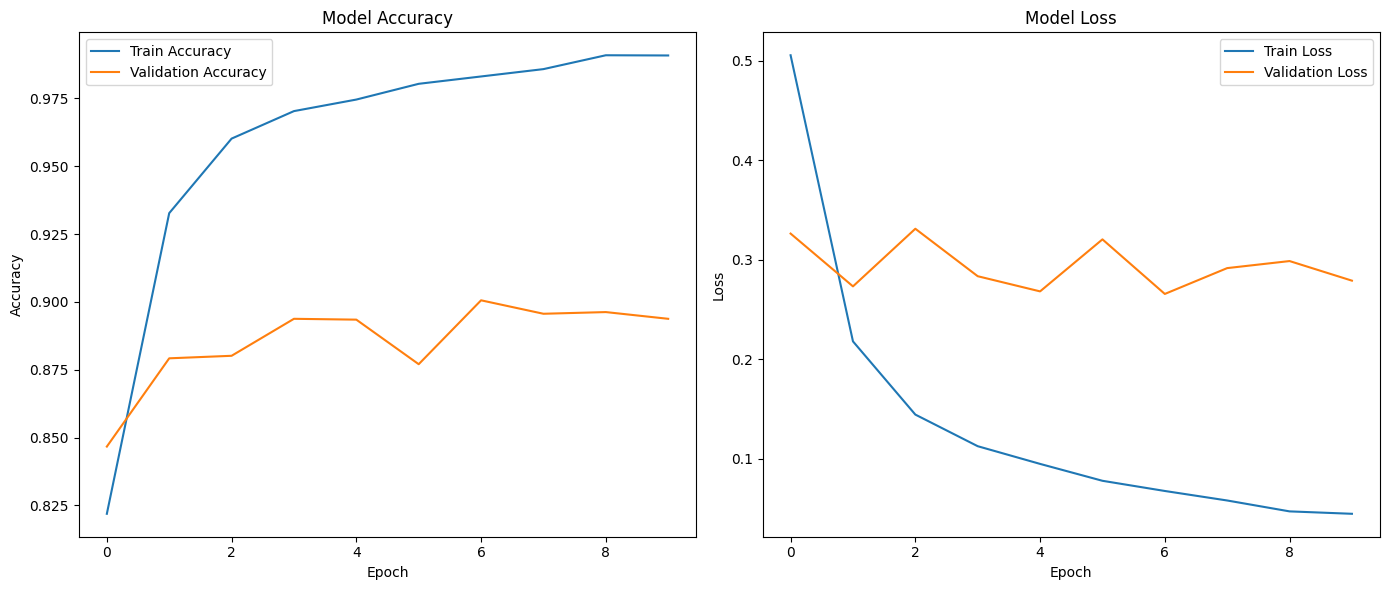

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Train Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 1s/step
Image: 00021_00000_00000.png, Predicted Class: Cautions


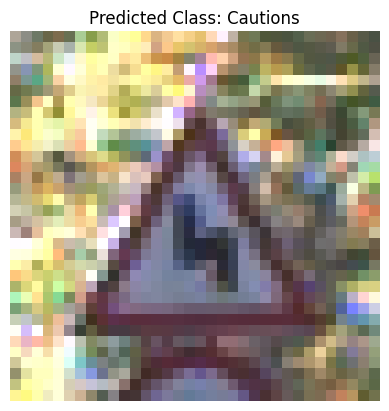

1/1 [==============================] - 0s 28ms/step
Image: 00021_00000_00001.png, Predicted Class: Crossings


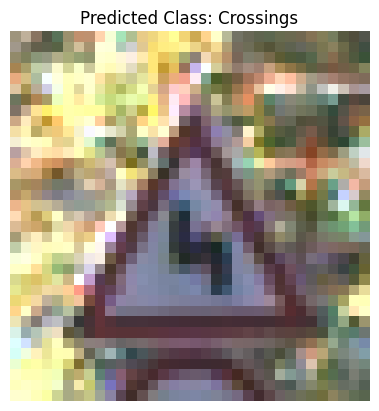

1/1 [==============================] - 0s 28ms/step
Image: 00027_00000_00002.png, Predicted Class: Cautions


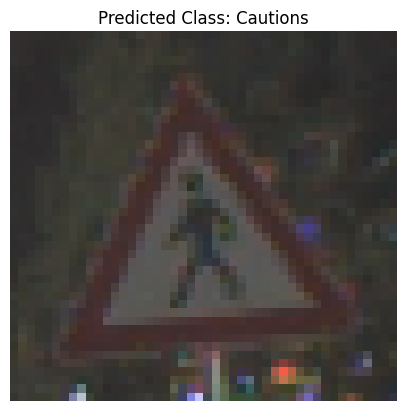

1/1 [==============================] - 0s 32ms/step
Image: 00027_00000_00003.png, Predicted Class: Crossings


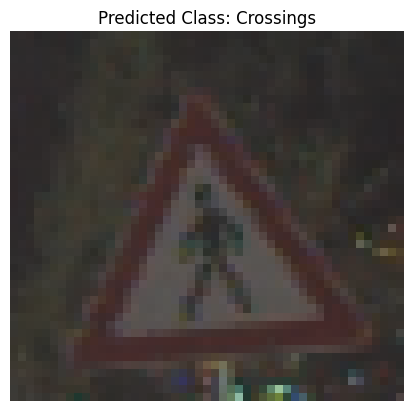

1/1 [==============================] - 0s 29ms/step
Image: 00015_00002_00026.png, Predicted Class: NoEntry


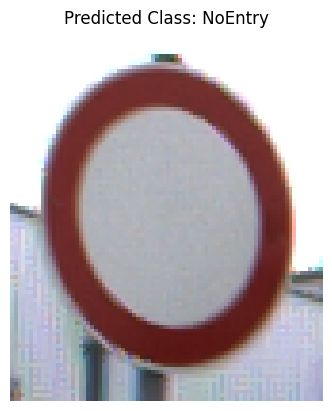

1/1 [==============================] - 0s 25ms/step
Image: 00014_00000_00002.png, Predicted Class: NoEntry


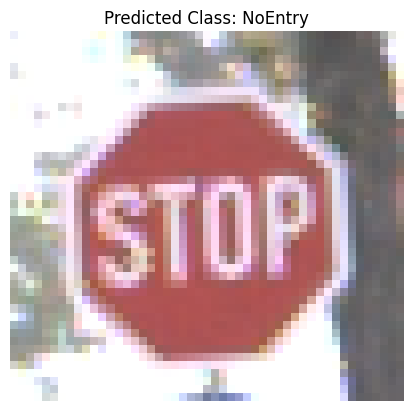

1/1 [==============================] - 0s 36ms/step
Image: 00008_00013_00018.png, Predicted Class: Speed Limit


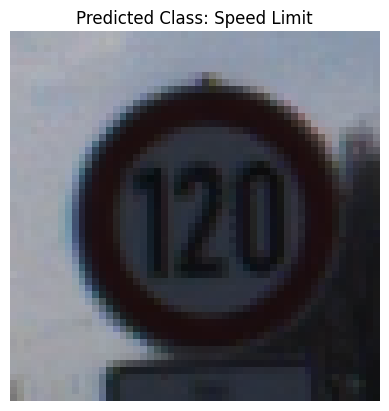

1/1 [==============================] - 0s 28ms/step
Image: 00036_00000_00001.png, Predicted Class: Direction


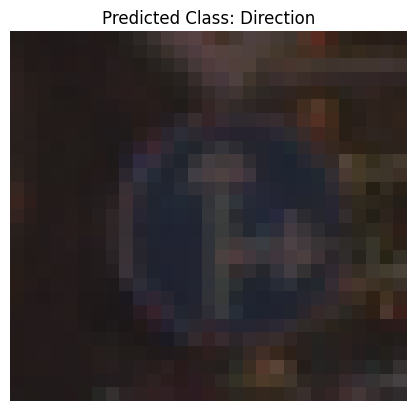

1/1 [==============================] - 0s 32ms/step
Image: 00004_00002_00011.png, Predicted Class: Speed Limit


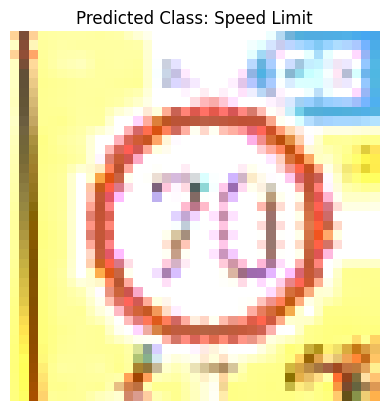

1/1 [==============================] - 0s 30ms/step
Image: 00036_00000_00002.png, Predicted Class: Direction


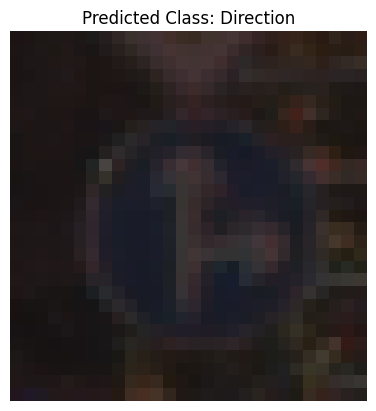

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model  # Only if your model isn't already in memory

# Assuming your VGG16 model is loaded and named 'model'
# If not, you might load it using load_model('path_to_your_model.h5')

def preprocess_image(image_path, target_size=(224, 224)):  # Update target_size for VGG16
    # Load image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to array
    img = img_to_array(img)
    # Scale the image
    img = img / 255.0
    # Expand dimensions to match the batch size
    img = np.expand_dims(img, axis=0)
    return img

# Provide the directory path containing images
test_dir_path = '/content/Traffic_Sign_-2/Test/'

# Dictionary mapping class indices to labels
class_labels = {0: 'Cautions', 1: 'Crossings', 2: 'Direction', 3: 'NoEntry', 4: 'Speed Limit'}

# Process each image in the directory
for filename in os.listdir(test_dir_path):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Check for image files
        image_path = os.path.join(test_dir_path, filename)
        test_image = preprocess_image(image_path)
        predictions = vgg16_model.predict(test_image)
        predicted_class_index = np.argmax(predictions, axis=1)
        predicted_class_label = class_labels[predicted_class_index[0]]

        # Output the result
        print(f"Image: {filename}, Predicted Class: {predicted_class_label}")

        # Display the image and prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class_label}")
        plt.axis('off')
        plt.show()


26/26 [==============================] - 44s 2s/step


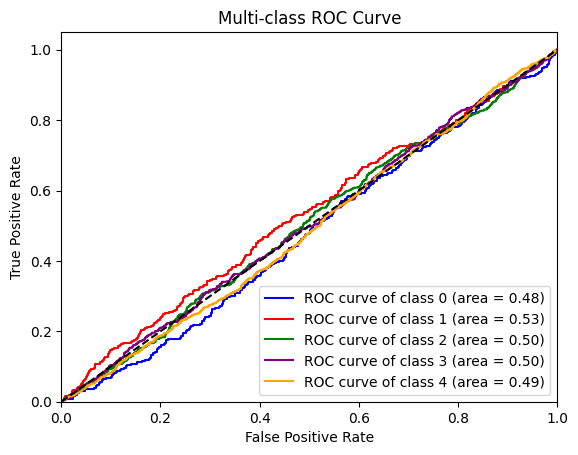

In [ ]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
import numpy as np

# Get predictions and true labels
predictions = vgg16_model.predict(validation_generator)
true_labels = validation_generator.classes
n_classes = 5

# Binarize the true labels for multi-class ROC curve
true_labels = label_binarize(true_labels, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the directory and parameters
train_directory = "/content/Traffic_Sign_-2/Train"
img_height = 224  # Set to match VGG16's expected height
img_width = 224   # Set to match VGG16's expected width
batch_size = 32   # Example batch size
num_samples_per_class = 10  # Number of images per class for the test set

# Load the full training dataset to get class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names and number of classes
class_names = train_ds.class_names
print("Class names:", class_names)
num_classes = len(class_names)

# Function to load and preprocess images
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    try:
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Allow dynamic shape for height and width
        image = tf.image.resize(image, [img_height, img_width])
        image.set_shape((img_height, img_width, 3))  # Ensure the final shape
        label = tf.one_hot(label, num_classes)  # One-hot encode the label
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        image = tf.zeros((img_height, img_width, 3))  # Use a placeholder in case of error
        label = tf.one_hot(label, num_classes)  # One-hot encode the placeholder label
    return image, label

# Sample 10 images per class
test_image_paths = []
test_labels = []

# Get a list of all images and their corresponding labels
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(train_directory, class_name)
    all_images = os.listdir(class_dir)
    selected_images = random.sample(all_images, num_samples_per_class)
    test_image_paths.extend([os.path.join(class_dir, img) for img in selected_images])
    test_labels.extend([class_index] * num_samples_per_class)

# Ensure all paths are valid and images are correctly loaded
valid_image_paths = []
valid_labels = []
for path, label in zip(test_image_paths, test_labels):
    try:
        image = tf.io.read_file(path)
        image = tf.image.decode_image(image, channels=3)
        if image.shape.rank == 3:  # Ensure image is 3-dimensional
            valid_image_paths.append(path)
            valid_labels.append(label)
    except Exception as e:
        print(f"Skipping file {path} due to error: {e}")

# Create a TensorFlow dataset from the valid image paths and labels
test_ds = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_ds = test_ds.map(lambda x, y: load_and_preprocess_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size)

# Evaluate the model
loss, accuracy = vgg16_model.evaluate(test_ds)
print("Test Accuracy: ", accuracy)
print("Test loss: ", loss)




Found 16157 files belonging to 5 classes.
Class names: ['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']
2/2 [==============================] - 0s 132ms/step - loss: 8.2186 - accuracy: 0.8400
Test Accuracy:  0.8399999737739563
Test loss:  8.218600273132324


2/2 [==============================] - 0s 154ms/step


<Figure size 1000x800 with 0 Axes>

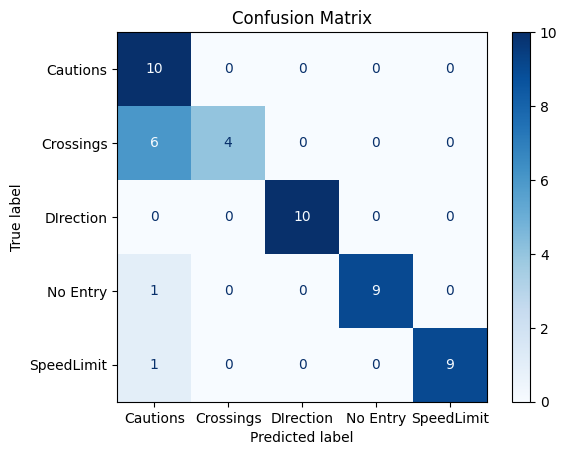

In [ ]:
# Make predictions on the test dataset
predictions = vgg16_model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, label in test_ds.unbatch():
    true_labels.append(np.argmax(label.numpy()))

true_labels = np.array(true_labels)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()